In [1]:
import pandas as pd
import pyreadstat
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import resample
%matplotlib inline
import math

In [3]:
# https://github.com/Roche/pyreadstat#basic-usage
df, meta = pyreadstat.read_sav("raw/surveydata/EVS_ABM1.sav", encoding='ISO-8859-1')

In [4]:
df.head()

,studyno,studynoc,version,versionc,doi,id_cocas,caseno,intno,year,country,...,v374c,v375,v376,v377,v378,Maintainorder,RelativeDeprivationFull,Intergration,Authorit,Trust
0,4800.0,4753.0,4.0.0 (2016-04-15),3.0.0 (2016-04-15),doi:10.4232/1.12458,2.008276e+11,1.0,111126.0,2008.0,276.0,...,NaN,1.0,33.0,200809.0,200902.0,NaN,NaN,2.000000,5.166667,2.750
1,4800.0,4753.0,4.0.0 (2016-04-15),3.0.0 (2016-04-15),doi:10.4232/1.12458,2.008276e+11,2.0,111126.0,2008.0,276.0,...,NaN,1.0,33.0,200809.0,200902.0,NaN,4.19625,2.000000,5.200000,NaN
2,4800.0,4753.0,4.0.0 (2016-04-15),3.0.0 (2016-04-15),doi:10.4232/1.12458,2.008276e+11,3.0,111126.0,2008.0,276.0,...,NaN,1.0,33.0,200809.0,200902.0,NaN,NaN,2.000000,NaN,2.375
3,4800.0,4753.0,4.0.0 (2016-04-15),3.0.0 (2016-04-15),doi:10.4232/1.12458,2.008276e+11,4.0,111126.0,2008.0,276.0,...,NaN,1.0,33.0,200809.0,200902.0,NaN,NaN,1.500000,NaN,3.375
4,4800.0,4753.0,4.0.0 (2016-04-15),3.0.0 (2016-04-15),doi:10.4232/1.12458,2.008276e+11,5.0,111126.0,2008.0,276.0,...,NaN,1.0,33.0,200809.0,200902.0,NaN,NaN,1.333333,5.266667,2.875


In [83]:
# check https://github.com/anthropedia/tci-stats/blob/master/tcistats/__init__.py
def cronbach_alpha(items):
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    return (items_count / float(items_count - 1) * (1 - variance_sum / total_var))

In [84]:
fundamentalism = ["Auth1", "Auth2", "Auth3", "Nonauth", "Nonauth2", "Nonauth1", 
                  "v233", "v234", "v235", "v236", "v237", "v238", "v239", "v240", "v241", "v242", "v243", "v244",
                  "v245", "v246", "v247", "v248", "v249", "v250", "v251",
                  "Deathpenalty", "Maintainorder", "TrueReligion", "PoliticalGd", "Religlead"]
# 
df_fundamentalism = df[['caseno'] + fundamentalism].copy()
df_fundamentalism = df_fundamentalism.rename(index=str, columns={"caseno": "original respondent number"})
# 
print("Cronbach's alhpa is: {}".format(cronbach_alpha(df_fundamentalism[fundamentalism])))

Cronbach's alhpa is: 0.8696118736029635


In [85]:
# replace column names with column labels
df.columns = meta.column_labels
# to go back to column names
#df.columns = meta.column_names

In [86]:
#for i in zip(df.columns, meta.column_labels):
#    print(i)

In [87]:
integration = ['how proud are you to be a ... (country) citizen (Q72)',
               'important: to have been born in [country] (Q80A)',
               'important: to respect [country nationality] political institutions and laws (Q80B)',
               'important: to have [country nationality] ancestry (Q80C)',
               'important: to be able to speak [country language] (Q80D)',
               'important: to have lived in [country] for a long time (Q80E)']
#
df_integration = df[['original respondent number'] + integration + ['age (recoded)',\
                                                                    'sex respondent (Q86)',\
                                                                    'having [countrys] nationality (Q88)',\
                                                                    'which religious denomination do you belong to (Q23a) (standardized)']].copy()
#
print("Cronbach's alhpa is: {}".format(cronbach_alpha(df_integration[integration])))

Cronbach's alhpa is: 0.7157896050817715


In [88]:
deprivation = ['how satisfied are you with your life (Q11)',
               'taking all things together how happy are you (Q3)',
               'how much control over your life (Q10)',
               'how satisfied are you with your job (Q16)',
               'monthly household income (x1000), corrected for ppp in euros']
# 
df_deprivation = df[['original respondent number'] + deprivation].copy()
# 
print("Cronbach's alhpa is: {}".format(cronbach_alpha(df_deprivation[deprivation])))

Cronbach's alhpa is: 0.9004031914892028


In [89]:
trust = ['how much confidence in: education system (Q63C)',
         'how much confidence in: social security system (Q63I)',
         'how much confidence in: the police (Q63F)',
         'how much confidence in: parliament (Q63G)',
         'how much confidence in: civil service (Q63H)',
         'how much confidence in: justice system (Q63N)',
         'how much confidence in: political parties (Q63Q)',
         'how much confidence in: government (Q63R)']
# 
df_trust = df[['original respondent number'] + trust].copy()
# 
print("Cronbach's alhpa is: {}".format(cronbach_alpha(df_trust[trust])))

Cronbach's alhpa is: 0.9392457096057037


In [90]:
def additive_index(arow, selection):
    new_row = arow[selection].sum()
    return new_row 

In [91]:
df_trust["trust_index"] = df_trust.apply(lambda x: additive_index(x, trust), axis=1)

In [92]:
df_deprivation["deprivation_index"] = df_deprivation.apply(lambda x: additive_index(x, deprivation), axis=1)

In [93]:
df_fundamentalism["fundamentalism_index"] = df_fundamentalism.apply(lambda x: additive_index(x, fundamentalism), axis=1)

In [94]:
df_integration["integration_index"] = df_integration.apply(lambda x: additive_index(x, integration), axis=1)

In [95]:
min_trust = min(df_trust["trust_index"])
max_trust = max(df_trust["trust_index"])
min_deprivation = min(df_deprivation["deprivation_index"])
max_deprivation = max(df_deprivation["deprivation_index"])
min_fundamentalism = min(df_fundamentalism["fundamentalism_index"])
max_fundamentalism = max(df_fundamentalism["fundamentalism_index"])
min_integration = min(df_integration["integration_index"])
max_integration = max(df_integration["integration_index"])

def rescale(x, amin, amax):
    '''
    rescale in range 0-1
    '''
    a = 0
    b = 1
    return (((b-a)*(x-amin)) / (amax - amin)) + a


In [96]:
df_trust["trust_index"] = df_trust.apply(lambda x: rescale(x["trust_index"], min_trust, max_trust), axis=1)

In [97]:
df_deprivation["deprivation_index"] = df_deprivation.apply(lambda x: rescale(x["deprivation_index"], min_deprivation, max_deprivation), axis=1)

In [98]:
df_fundamentalism["fundamentalism_index"] = df_fundamentalism.apply(lambda x: rescale(x["fundamentalism_index"], min_fundamentalism, max_fundamentalism), axis=1)

In [99]:
df_integration["integration_index"] = df_integration.apply(lambda x: rescale(x["integration_index"], min_integration, max_integration), axis=1)

In [100]:
ids = ['original respondent number', 'age (recoded)', 'sex respondent (Q86)', 'having [countrys] nationality (Q88)', 'which religious denomination do you belong to (Q23a) (standardized)']

In [101]:
# join data frames together
df_indices = df_integration[ids + ['integration_index']].set_index('original respondent number')\
.join(df_deprivation.set_index('original respondent number')['deprivation_index'])\
.join(df_fundamentalism.set_index('original respondent number')['fundamentalism_index'])\
.join(df_trust.set_index('original respondent number')['trust_index'])
df_indices.reset_index(inplace=True)
df_indices.columns = ['id', 'age', 'male?', 'immigrant?', 'muslim?', 'integration', 'deprivation', 'fundamentalism', 'trust']


In [102]:
def check_muslim(x):
    if math.isnan(x): 
        return None
    elif x==5:
        return 1
    elif x!=5:
        return 0
    else:
        return "ERROR"
df_indices['muslim?'] = df_indices['muslim?'].apply(lambda x: check_muslim(x))
df_indices.head()

,id,age,male?,immigrant?,muslim?,integration,deprivation,fundamentalism,trust
0,1.0,5.0,1.0,1.0,0.0,0.545455,0.517655,0.719457,0.68750
1,2.0,4.0,1.0,1.0,0.0,0.545455,0.539277,0.719457,0.59375
2,3.0,2.0,2.0,1.0,NaN,0.545455,0.316504,0.606335,0.59375
3,4.0,4.0,2.0,1.0,NaN,0.409091,0.529189,0.705882,0.84375
4,5.0,6.0,1.0,1.0,NaN,0.363636,0.549365,0.733032,0.71875


In [103]:
def mix(x):
    return pd.Series({'integration':list(x.integration),\
                      'trust': list(x.trust),\
                      'deprivation': list(x.deprivation),\
                      'fundamentalism': list(x.fundamentalism)})


In [105]:
df_combinations = df_indices.groupby(['age', 'male?', 'immigrant?', 'muslim?']).apply(mix)
df_combinations.head()
len(df_combinations)

34

In [106]:
mux = pd.MultiIndex.from_product(df_combinations.index.levels, names=['age','male?', 'immigrant?', 'muslim?'])

In [107]:
df_combinations = df_combinations.reindex(mux, fill_value=0).reset_index()

In [108]:
print("Current combinations are {}, while theoretical combinations are {}".format(len(df_combinations), (len(pd.unique(df_combinations.age)) * 2 * 2 * 2)))

Current combinations are 48, while theoretical combinations are 48


In [109]:
population_data = resample(df_indices.dropna(), replace=True, n_samples=100000)
population_data.to_csv("bootstrapped_data.csv", index=None)

### SOME STATS ON INDICES DISTRIBUTIONS

In [56]:
df_distrust["distrust_index_normalized"] = df_distrust.apply(lambda x: rescale(x["distrust_index"]), axis=1)

NameError: name 'df_distrust' is not defined

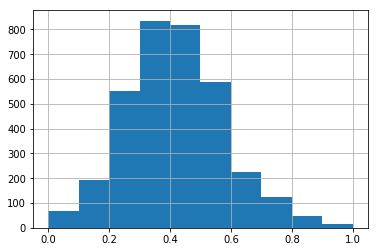

In [155]:
df_distrust["distrust_index_normalized"].hist(bins=10)

In [163]:
distrust = df_distrust[["RESPONDENT: AGE", "RESPONDENT: SEX", "RESPONDENT: RELIGIOUS DENOMINATION", "GERMAN CITIZENSHIP?", "distrust_index_normalized"]]
distrust.columns = ['age', 'sex', 'religion', 'resident', 'distrust']
distrust.head()

,age,sex,religion,resident,distrust
0,63.0,1.0,6.0,1.0,0.309524
1,23.0,1.0,1.0,1.0,0.595238
2,67.0,2.0,3.0,1.0,0.523810
3,33.0,2.0,6.0,1.0,0.000000
4,64.0,2.0,3.0,1.0,0.285714


In [166]:
pd.crosstab(distrust["religion"], [distrust["sex"], distrust["age"], distrust["resident"]], values=distrust["distrust"], aggfunc='mean').round(5)

sex           1.0                                                        \
age          18.0              19.0              20.0                     
resident      1.0      3.0      1.0      3.0      1.0      2.0      3.0   
religion                                                                  
1.0       0.45714      NaN  0.39744      NaN  0.38492      NaN      NaN   
2.0       0.26190      NaN      NaN      NaN      NaN      NaN      NaN   
3.0       0.30060  0.21429  0.41190      NaN  0.36147  0.47619      NaN   
4.0           NaN  0.30952      NaN      NaN      NaN      NaN      NaN   
5.0           NaN  0.50000      NaN  0.57143  0.29762      NaN      NaN   
6.0       0.47279      NaN  0.35238      NaN  0.32993      NaN  0.78571   

sex                                   ...         2.0                    \
age          21.0              22.0   ...        88.0     89.0     90.0   
resident      1.0      2.0      1.0   ...         1.0      1.0      1.0   
religion                              ...                                 
1.0       0.39286      NaN  0.53571   ...     0.42063  0.28571      NaN   
2.0           NaN      NaN      NaN   ...         NaN      NaN      NaN   
3.0       0.46230      NaN  0.27778   ...     0.70238      NaN  0.36905   
4.0       0.52381      NaN      NaN   ...         NaN      NaN      NaN   
5.0           NaN      NaN      NaN   ...         NaN      NaN      NaN   
6.0       0.31633  0.33333  0.43899   ...         NaN      NaN      NaN   

sex                                                                  
age          91.0     92.0     93.0 94.0     95.0     96.0     97.0  
resident      1.0      1.0      1.0  1.0      1.0      1.0      1.0  
religion                                                             
1.0       0.38095  0.34524  0.47619  1.0  0.30952  0.47619      NaN  
2.0           NaN      NaN      NaN  NaN      NaN      NaN      NaN  
3.0           NaN      NaN      NaN  NaN      NaN      NaN      NaN  
4.0           NaN      NaN  0.50000  NaN      NaN      NaN      NaN  
5.0           NaN      NaN      NaN  NaN      NaN      NaN      NaN  
6.0           NaN      NaN      NaN  NaN      NaN      NaN  0.69048  

[6 rows x 269 columns]